In [1]:
import sklearn.datasets as datasets
import pandas as pd
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.tree import DecisionTreeClassifier

import numpy as np
import matplotlib.pyplot as plt

original_df=pd.read_csv('../data/zoo-animal-classification/zoo.csv', index_col=False)
class_names_df = pd.read_csv('../data/zoo-animal-classification/class.csv', index_col=False)
class_only = class_names_df[['Class_Number', 'Class_Type']]
class_only = class_only.rename(columns={'Class_Number': 'class_type', "Class_Type": "class_name"})
df = pd.merge(original_df, class_only, on='class_type', how='outer')
y=df['class_name']

df_class = df.copy()
del df['animal_name']
del df['class_name']
del df['class_type']

for col in df.columns:
    items = list(df[col].unique())
    items.sort()
    if items==[0,1]:
        df[col]=df[col].astype(bool)

In [2]:
df_bool = df.copy()
df_bool

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
3,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
4,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
5,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1
6,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0
7,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
8,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
9,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,1


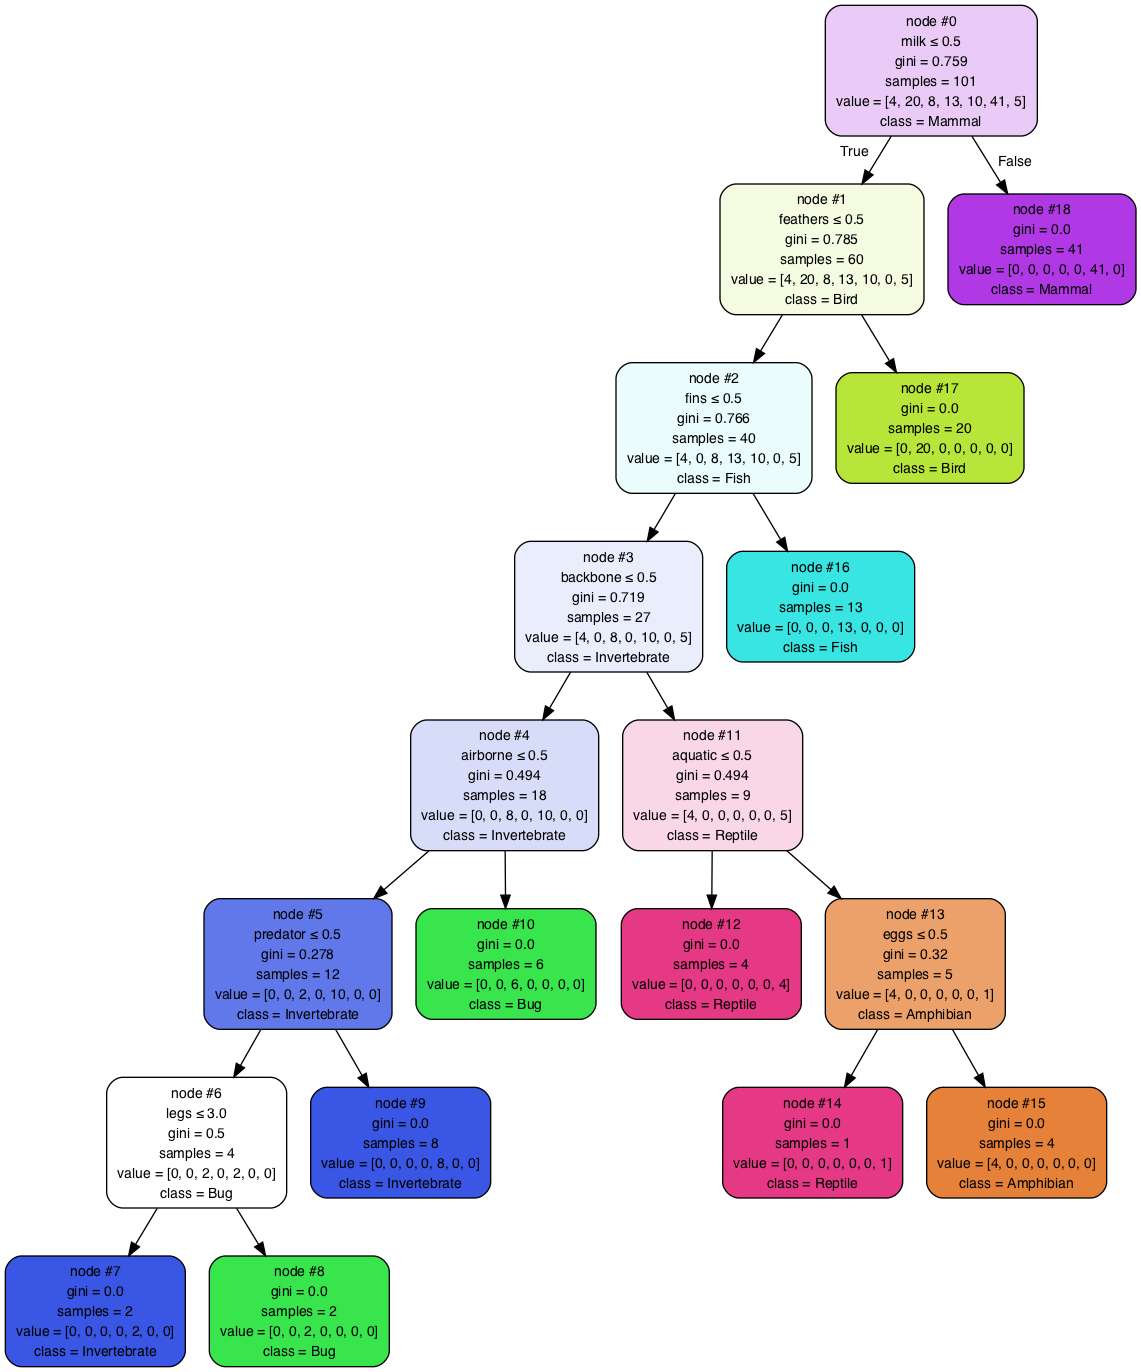

In [3]:
dtree=DecisionTreeClassifier()
dtree.fit(df_bool,y)
dot_data = StringIO()
class_names=list(class_only['class_name'].unique())
class_names.sort()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, proportion=False, feature_names = df.columns, node_ids=True, class_names=class_names)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())




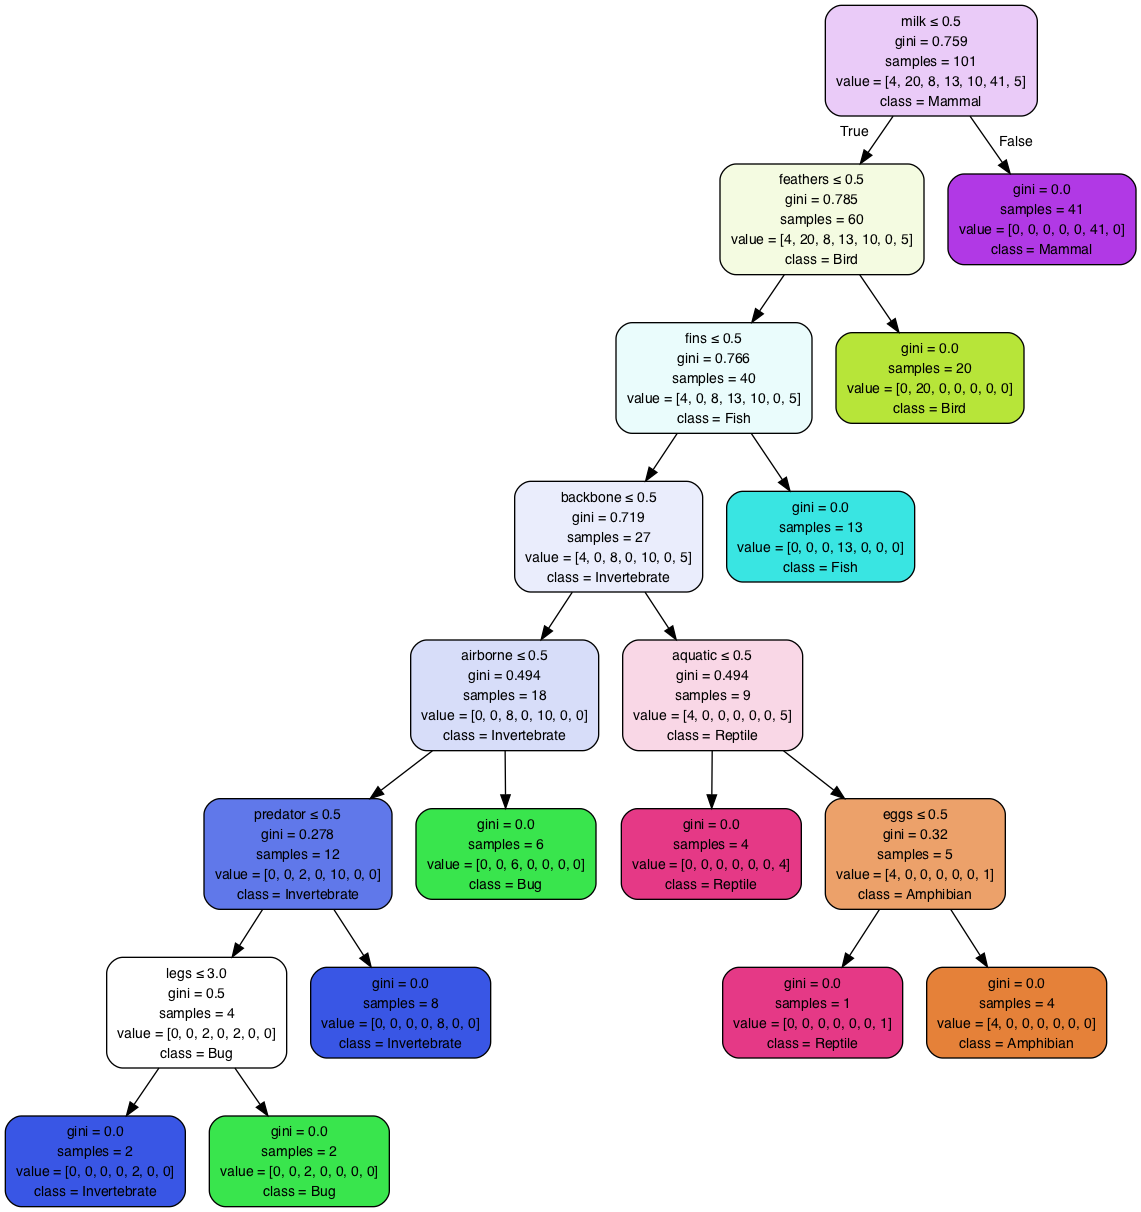

In [4]:
dtree=DecisionTreeClassifier()
dtree.fit(df_bool,y)
dot_data = StringIO()
class_names=list(class_only['class_name'].unique())
class_names.sort()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, proportion=False, feature_names = df.columns, node_ids=False, class_names=class_names)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


In [5]:
class_names = list(class_only['class_name'])

In [6]:
class_names.sort()
class_names

['Amphibian', 'Bird', 'Bug', 'Fish', 'Invertebrate', 'Mammal', 'Reptile']

In [7]:
del df_class['animal_name']

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


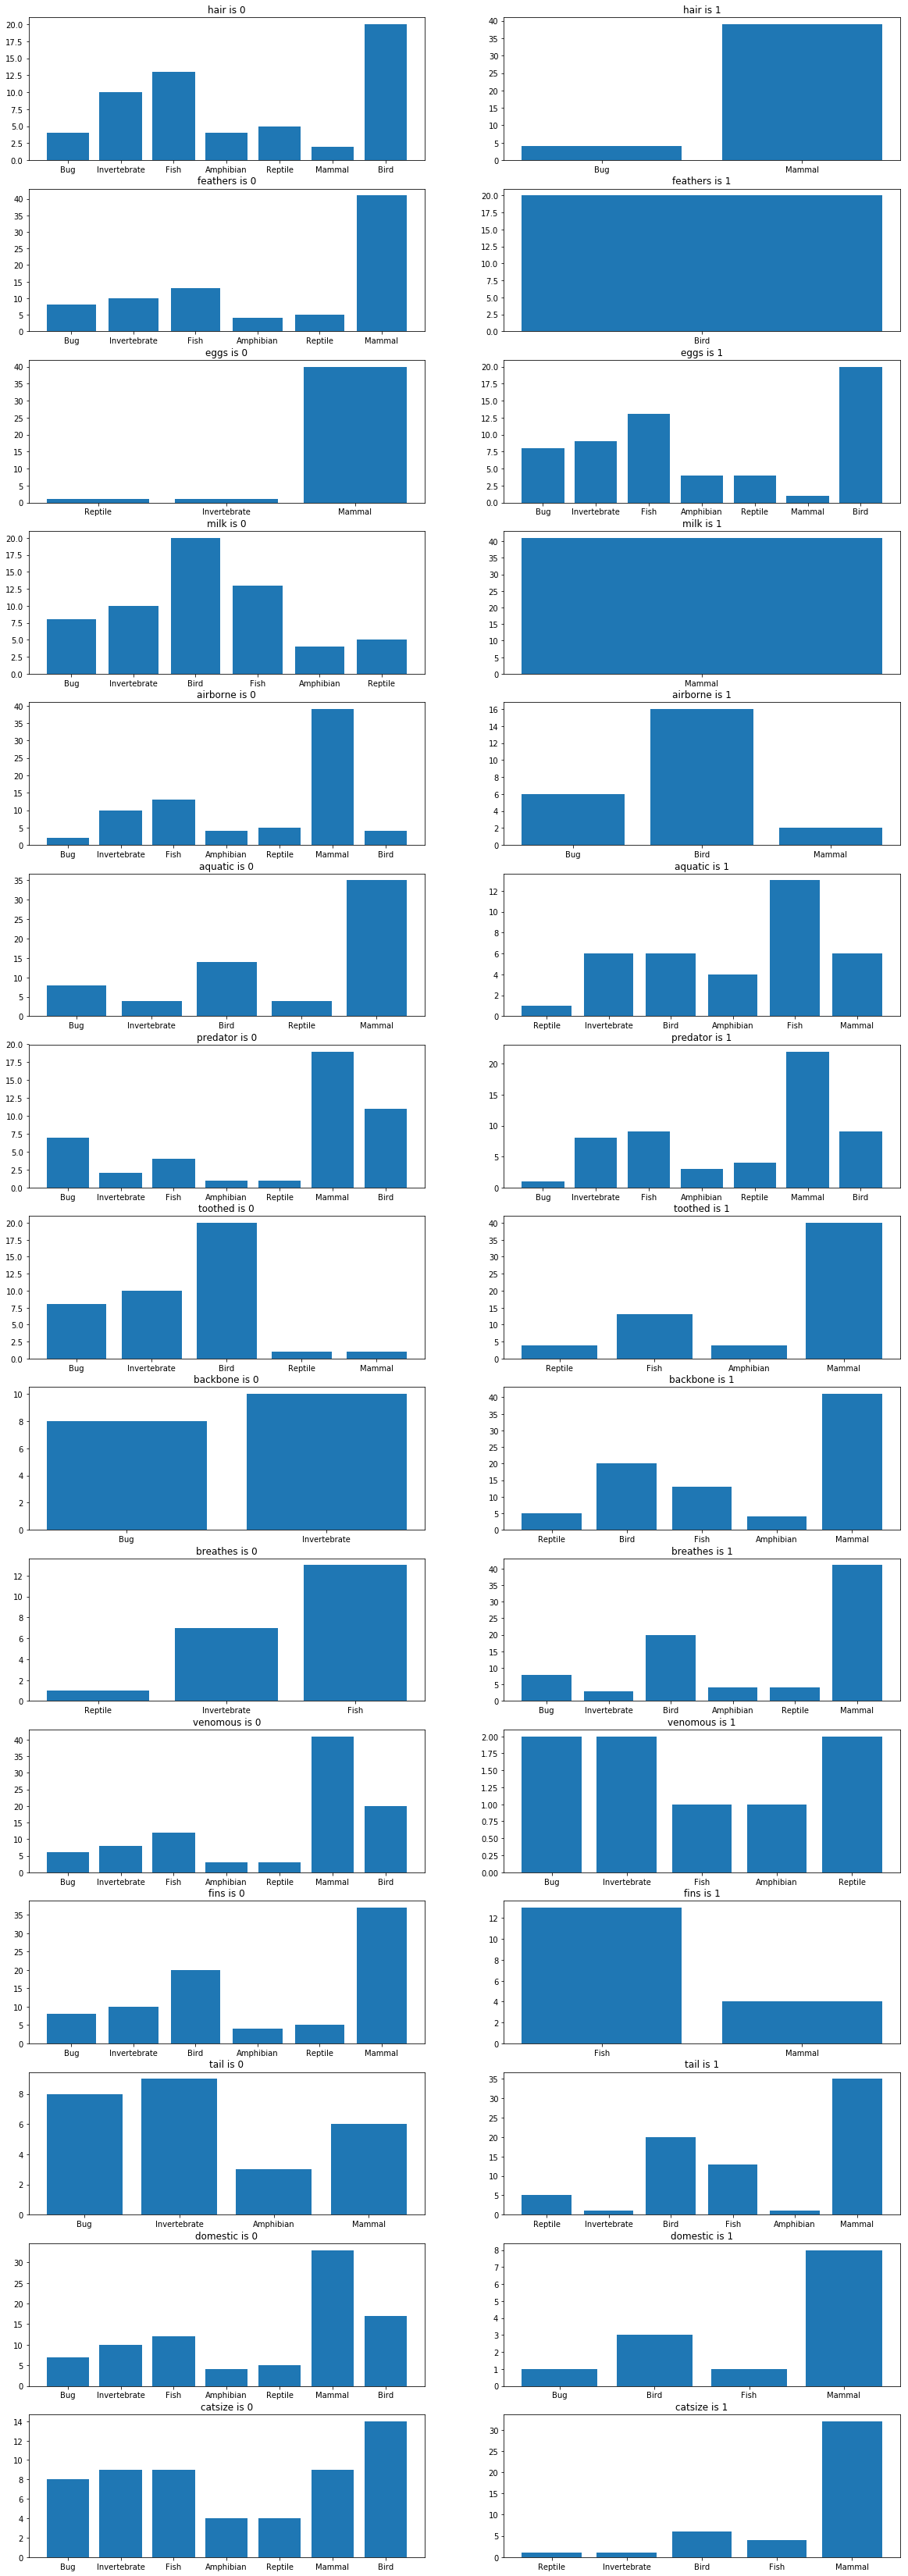

In [8]:
import matplotlib.pyplot as plt

def make_attribute_view(df_class, filename):
    oFig1 = plt.figure(1, figsize=(20,80))
       #(m,n,x) -> x starts with 1
    ...
    # iterating through every column in datafarme
    plot_index = 1
    for col in df_class.columns:
        temp_class_name = col
        unique_col_values =list(df_class[temp_class_name].unique())
        unique_col_values.sort()

        if unique_col_values==[0,1]:
            # for a given column; plot distribution for every possible value

            for i in range(0, len(unique_col_values)):
                unique_col_value = unique_col_values[i]
                temp_df = df_class[df_class[temp_class_name]==unique_col_value]
                hist_vals = temp_df['class_name'].value_counts(sort=False)
                print(plot_index)
                new = oFig1.add_subplot(20,2, plot_index)   
                new.bar(hist_vals.index.values, hist_vals.values)
                new.set_title(temp_class_name + " is " + str(unique_col_value))
                plot_index+=1
    plt.show()

    oFig1.savefig('python_plots/' + filename, pad_inches=0.4, bbox_inches="tight")

make_attribute_view(df_class, 'milk')

In [9]:
df_class[df_class['milk']==1]['class_name'].value_counts()

Mammal    41
Name: class_name, dtype: int64

<BarContainer object of 7 artists>

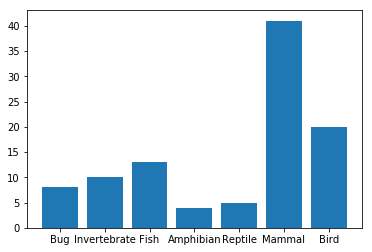

In [10]:
hist_vals = df_class['class_name'].value_counts(sort=False)
plt.bar(hist_vals.index.values, hist_vals.values)

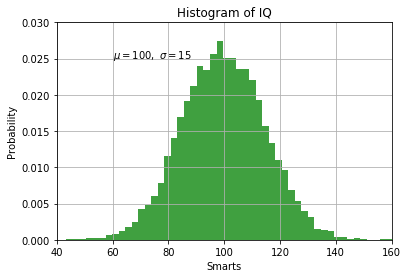

In [11]:


# Fixing random state for reproducibility
np.random.seed(19680801)

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

In [12]:
export_graphviz(dtree, out_file='zoo.dot',  
                filled=True, rounded=True,
                special_characters=True, feature_names = df.columns, class_names=list(class_only['class_name'].unique()))

In [13]:
dot_string= dot_data.getvalue()
x = dot_string.replace("&le;", "<=") #.replace("&#35;", "->")
x = x.replace("\n", "")
x = x.replace("<br/>", ",")
x = x.replace("label=<", "")
x = x.split(";")
x = x[2:-1]

In [14]:
import re
edge_list =[]
node_list =[]
element_regex = re.compile(r'.+->.+')
for i in x:
    if element_regex.match(i):
        edge_list.append(i)
    else:
        node_list.append(i)

In [15]:
edge_list

['0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ',
 '1 -> 2 ',
 '2 -> 3 ',
 '3 -> 4 ',
 '4 -> 5 ',
 '5 -> 6 ',
 '6 -> 7 ',
 '6 -> 8 ',
 '5 -> 9 ',
 '4 -> 10 ',
 '3 -> 11 ',
 '11 -> 12 ',
 '11 -> 13 ',
 '13 -> 14 ',
 '13 -> 15 ',
 '2 -> 16 ',
 '1 -> 17 ',
 '0 -> 18 [labeldistance=2.5, labelangle=-45, headlabel="False"] ']

In [16]:
node_list

['0 [milk <= 0.5,gini = 0.759,samples = 101,value = [4, 20, 8, 13, 10, 41, 5],class = Mammal>, fillcolor="#b139e542"] ',
 '1 [feathers <= 0.5,gini = 0.785,samples = 60,value = [4, 20, 8, 13, 10, 0, 5],class = Bird>, fillcolor="#b7e53926"] ',
 '2 [fins <= 0.5,gini = 0.766,samples = 40,value = [4, 0, 8, 13, 10, 0, 5],class = Fish>, fillcolor="#39e5e21a"] ',
 '3 [backbone <= 0.5,gini = 0.719,samples = 27,value = [4, 0, 8, 0, 10, 0, 5],class = Invertebrate>, fillcolor="#3956e51b"] ',
 '4 [airborne <= 0.5,gini = 0.494,samples = 18,value = [0, 0, 8, 0, 10, 0, 0],class = Invertebrate>, fillcolor="#3956e533"] ',
 '5 [predator <= 0.5,gini = 0.278,samples = 12,value = [0, 0, 2, 0, 10, 0, 0],class = Invertebrate>, fillcolor="#3956e5cc"] ',
 '6 [legs <= 3.0,gini = 0.5,samples = 4,value = [0, 0, 2, 0, 2, 0, 0],class = Bug>, fillcolor="#39e54d00"] ',
 '7 [gini = 0.0,samples = 2,value = [0, 0, 0, 0, 2, 0, 0],class = Invertebrate>, fillcolor="#3956e5ff"] ',
 '8 [gini = 0.0,samples = 2,value = [0, 0, 2

In [17]:
node_list

['0 [milk <= 0.5,gini = 0.759,samples = 101,value = [4, 20, 8, 13, 10, 41, 5],class = Mammal>, fillcolor="#b139e542"] ',
 '1 [feathers <= 0.5,gini = 0.785,samples = 60,value = [4, 20, 8, 13, 10, 0, 5],class = Bird>, fillcolor="#b7e53926"] ',
 '2 [fins <= 0.5,gini = 0.766,samples = 40,value = [4, 0, 8, 13, 10, 0, 5],class = Fish>, fillcolor="#39e5e21a"] ',
 '3 [backbone <= 0.5,gini = 0.719,samples = 27,value = [4, 0, 8, 0, 10, 0, 5],class = Invertebrate>, fillcolor="#3956e51b"] ',
 '4 [airborne <= 0.5,gini = 0.494,samples = 18,value = [0, 0, 8, 0, 10, 0, 0],class = Invertebrate>, fillcolor="#3956e533"] ',
 '5 [predator <= 0.5,gini = 0.278,samples = 12,value = [0, 0, 2, 0, 10, 0, 0],class = Invertebrate>, fillcolor="#3956e5cc"] ',
 '6 [legs <= 3.0,gini = 0.5,samples = 4,value = [0, 0, 2, 0, 2, 0, 0],class = Bug>, fillcolor="#39e54d00"] ',
 '7 [gini = 0.0,samples = 2,value = [0, 0, 0, 0, 2, 0, 0],class = Invertebrate>, fillcolor="#3956e5ff"] ',
 '8 [gini = 0.0,samples = 2,value = [0, 0, 2

In [18]:
edge_df = pd.DataFrame(columns=['current_node', 'parent_node'])
for i in range(0, len(edge_list)):
    print(edge_list[i])
    pattern = "(\d+)"
    a = re.findall(pattern, edge_list[i])
    source = a[0]
    destination = a[1]
    edge_df = edge_df.append({'current_node': destination, 'parent_node': source}, ignore_index=True)
edge_df

0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] 
1 -> 2 
2 -> 3 
3 -> 4 
4 -> 5 
5 -> 6 
6 -> 7 
6 -> 8 
5 -> 9 
4 -> 10 
3 -> 11 
11 -> 12 
11 -> 13 
13 -> 14 
13 -> 15 
2 -> 16 
1 -> 17 
0 -> 18 [labeldistance=2.5, labelangle=-45, headlabel="False"] 


,current_node,parent_node
0,1,0
1,2,1
2,3,2
3,4,3
4,5,4
5,6,5
6,7,6
7,8,6
8,9,5
9,10,4


In [19]:

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure


In [20]:
x=np.arange(10)
x.shape
np.ones(x.shape)*0.4

array([0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.4])

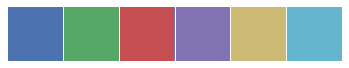

In [21]:
import seaborn as sns; sns.set()
sns.palplot(sns.color_palette())
def get_node_string(orig):
    print(orig)
    
    # parse and retrieve value
    node_name = re.search('^\d+', orig).group(0)
    samples = re.search('samples = (\d+)', orig).group(1)
    gini = re.search('gini = (\d+.\d+)', orig).group(1)
    class_name = re.search('class = (\w+)', orig).group(1)
    color = re.search('fillcolor=(.+")', orig).group(1)
    value =  re.search( 'value = (.+]),', orig).group(1)
    new_value = value.replace('[', '').replace(']', '').split(",")
    
    
    #make figure:
    fig, (ax1, ax2) = plt.subplots(1,2, gridspec_kw = {'width_ratios':[1, 3]}, figsize=(4, 2))
    
    #gini plot
    ax1.set_title('gini')
    ax1.bar(0, float(gini), color='darkred')
    ax1.get_xaxis().set_visible(False)
    
    
    #class distribution plot
    ax2.set_title('class distribution')
    plot_class_names = list(class_only['class_name'])
    _X = np.arange(len(plot_class_names))
    print(new_value)
    new_new_value = [int(x) for x in new_value]
    ax2.bar(plot_class_names, new_new_value, color=sns.color_palette("Paired")[0:8])
    ax2.set_ylim(0, 45)

   
    
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=90)
    
    plot_name = 'plots/'+'gini' + str(node_name) + '.png'
    plt.show()
    
    temp_row = {'current_node': node_name, 'gini': gini, 'samples': samples, 'class_name': class_name, 'color': color, 'value': value, 'plot_name': plot_name}
    
    #check if gini is in the first result
    s = orig.split(',')
    pattern = 'gini'
    gini_match = re.search(pattern, s[0])
    
    if gini_match is None: 
        attribute = s[0].split("[")[1]
        temp_row['attribute']= attribute
   
        
    return (temp_row, fig)

In [22]:
ult_df = pd.DataFrame(columns=['current_node', 'attribute', 'gini', 'samples', 'value', 'class_name', 'color', 'plot_name'])
# ult_df = df_.fillna(0) # with 0s rather than NaNs
ult_df

,current_node,attribute,gini,samples,value,class_name,color,plot_name


In [23]:
node_list

['0 [milk <= 0.5,gini = 0.759,samples = 101,value = [4, 20, 8, 13, 10, 41, 5],class = Mammal>, fillcolor="#b139e542"] ',
 '1 [feathers <= 0.5,gini = 0.785,samples = 60,value = [4, 20, 8, 13, 10, 0, 5],class = Bird>, fillcolor="#b7e53926"] ',
 '2 [fins <= 0.5,gini = 0.766,samples = 40,value = [4, 0, 8, 13, 10, 0, 5],class = Fish>, fillcolor="#39e5e21a"] ',
 '3 [backbone <= 0.5,gini = 0.719,samples = 27,value = [4, 0, 8, 0, 10, 0, 5],class = Invertebrate>, fillcolor="#3956e51b"] ',
 '4 [airborne <= 0.5,gini = 0.494,samples = 18,value = [0, 0, 8, 0, 10, 0, 0],class = Invertebrate>, fillcolor="#3956e533"] ',
 '5 [predator <= 0.5,gini = 0.278,samples = 12,value = [0, 0, 2, 0, 10, 0, 0],class = Invertebrate>, fillcolor="#3956e5cc"] ',
 '6 [legs <= 3.0,gini = 0.5,samples = 4,value = [0, 0, 2, 0, 2, 0, 0],class = Bug>, fillcolor="#39e54d00"] ',
 '7 [gini = 0.0,samples = 2,value = [0, 0, 0, 0, 2, 0, 0],class = Invertebrate>, fillcolor="#3956e5ff"] ',
 '8 [gini = 0.0,samples = 2,value = [0, 0, 2

0 [milk <= 0.5,gini = 0.759,samples = 101,value = [4, 20, 8, 13, 10, 41, 5],class = Mammal>, fillcolor="#b139e542"] 
['4', ' 20', ' 8', ' 13', ' 10', ' 41', ' 5']


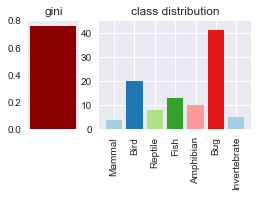

1 [feathers <= 0.5,gini = 0.785,samples = 60,value = [4, 20, 8, 13, 10, 0, 5],class = Bird>, fillcolor="#b7e53926"] 
['4', ' 20', ' 8', ' 13', ' 10', ' 0', ' 5']


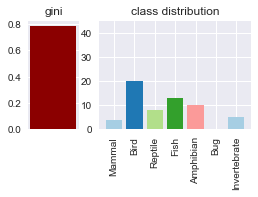

2 [fins <= 0.5,gini = 0.766,samples = 40,value = [4, 0, 8, 13, 10, 0, 5],class = Fish>, fillcolor="#39e5e21a"] 
['4', ' 0', ' 8', ' 13', ' 10', ' 0', ' 5']


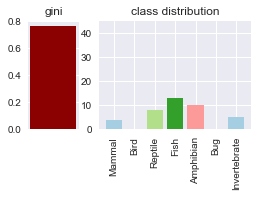

3 [backbone <= 0.5,gini = 0.719,samples = 27,value = [4, 0, 8, 0, 10, 0, 5],class = Invertebrate>, fillcolor="#3956e51b"] 
['4', ' 0', ' 8', ' 0', ' 10', ' 0', ' 5']


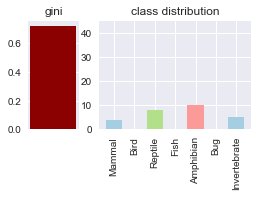

4 [airborne <= 0.5,gini = 0.494,samples = 18,value = [0, 0, 8, 0, 10, 0, 0],class = Invertebrate>, fillcolor="#3956e533"] 
['0', ' 0', ' 8', ' 0', ' 10', ' 0', ' 0']


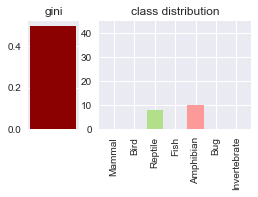

5 [predator <= 0.5,gini = 0.278,samples = 12,value = [0, 0, 2, 0, 10, 0, 0],class = Invertebrate>, fillcolor="#3956e5cc"] 
['0', ' 0', ' 2', ' 0', ' 10', ' 0', ' 0']


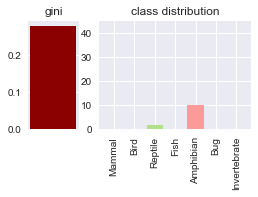

6 [legs <= 3.0,gini = 0.5,samples = 4,value = [0, 0, 2, 0, 2, 0, 0],class = Bug>, fillcolor="#39e54d00"] 
['0', ' 0', ' 2', ' 0', ' 2', ' 0', ' 0']


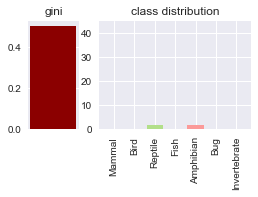

7 [gini = 0.0,samples = 2,value = [0, 0, 0, 0, 2, 0, 0],class = Invertebrate>, fillcolor="#3956e5ff"] 
['0', ' 0', ' 0', ' 0', ' 2', ' 0', ' 0']


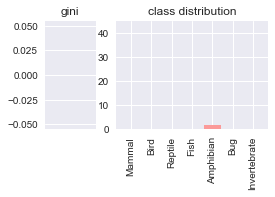

8 [gini = 0.0,samples = 2,value = [0, 0, 2, 0, 0, 0, 0],class = Bug>, fillcolor="#39e54dff"] 
['0', ' 0', ' 2', ' 0', ' 0', ' 0', ' 0']


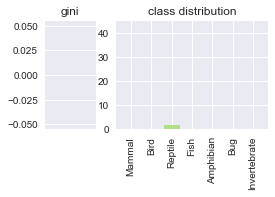

9 [gini = 0.0,samples = 8,value = [0, 0, 0, 0, 8, 0, 0],class = Invertebrate>, fillcolor="#3956e5ff"] 
['0', ' 0', ' 0', ' 0', ' 8', ' 0', ' 0']


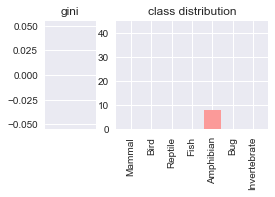

10 [gini = 0.0,samples = 6,value = [0, 0, 6, 0, 0, 0, 0],class = Bug>, fillcolor="#39e54dff"] 
['0', ' 0', ' 6', ' 0', ' 0', ' 0', ' 0']


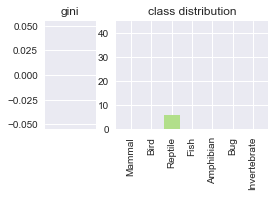

11 [aquatic <= 0.5,gini = 0.494,samples = 9,value = [4, 0, 0, 0, 0, 0, 5],class = Reptile>, fillcolor="#e5398633"] 
['4', ' 0', ' 0', ' 0', ' 0', ' 0', ' 5']


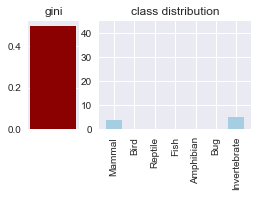

12 [gini = 0.0,samples = 4,value = [0, 0, 0, 0, 0, 0, 4],class = Reptile>, fillcolor="#e53986ff"] 
['0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 4']


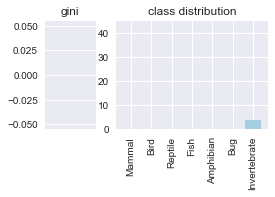

13 [eggs <= 0.5,gini = 0.32,samples = 5,value = [4, 0, 0, 0, 0, 0, 1],class = Amphibian>, fillcolor="#e58139bf"] 
['4', ' 0', ' 0', ' 0', ' 0', ' 0', ' 1']


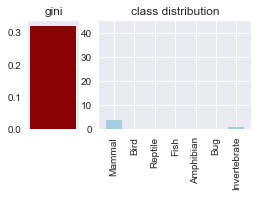

14 [gini = 0.0,samples = 1,value = [0, 0, 0, 0, 0, 0, 1],class = Reptile>, fillcolor="#e53986ff"] 
['0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 1']


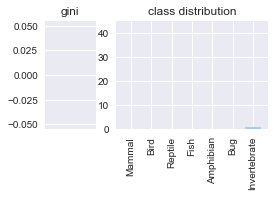

15 [gini = 0.0,samples = 4,value = [4, 0, 0, 0, 0, 0, 0],class = Amphibian>, fillcolor="#e58139ff"] 
['4', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0']


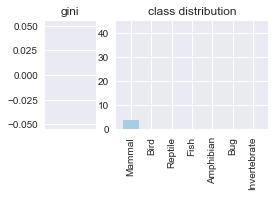

16 [gini = 0.0,samples = 13,value = [0, 0, 0, 13, 0, 0, 0],class = Fish>, fillcolor="#39e5e2ff"] 
['0', ' 0', ' 0', ' 13', ' 0', ' 0', ' 0']


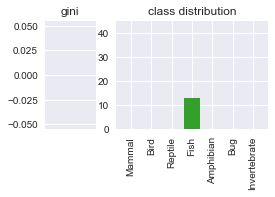

17 [gini = 0.0,samples = 20,value = [0, 20, 0, 0, 0, 0, 0],class = Bird>, fillcolor="#b7e539ff"] 
['0', ' 20', ' 0', ' 0', ' 0', ' 0', ' 0']


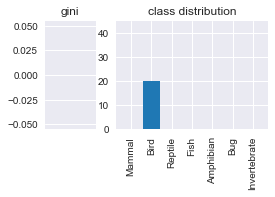

18 [gini = 0.0,samples = 41,value = [0, 0, 0, 0, 0, 41, 0],class = Mammal>, fillcolor="#b139e5ff"] 
['0', ' 0', ' 0', ' 0', ' 0', ' 41', ' 0']


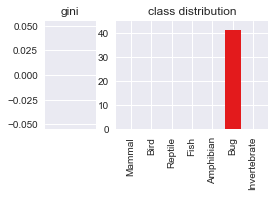

In [24]:
ult_list = {}
for i in range(0, len(node_list)):
    (node_string, fig) = get_node_string(node_list[i])
    ult_df = ult_df.append(node_string, ignore_index=True)
    fig.savefig('../treant-js/examples/decision-tree/' + node_string['plot_name'], pad_inches=0.4, bbox_inches="tight")

In [25]:
ult_df

,current_node,attribute,gini,samples,value,class_name,color,plot_name
0,0,milk <= 0.5,0.759,101,"[4, 20, 8, 13, 10, 41, 5]",Mammal,"""#b139e542""",plots/gini0.png
1,1,feathers <= 0.5,0.785,60,"[4, 20, 8, 13, 10, 0, 5]",Bird,"""#b7e53926""",plots/gini1.png
2,2,fins <= 0.5,0.766,40,"[4, 0, 8, 13, 10, 0, 5]",Fish,"""#39e5e21a""",plots/gini2.png
3,3,backbone <= 0.5,0.719,27,"[4, 0, 8, 0, 10, 0, 5]",Invertebrate,"""#3956e51b""",plots/gini3.png
4,4,airborne <= 0.5,0.494,18,"[0, 0, 8, 0, 10, 0, 0]",Invertebrate,"""#3956e533""",plots/gini4.png
5,5,predator <= 0.5,0.278,12,"[0, 0, 2, 0, 10, 0, 0]",Invertebrate,"""#3956e5cc""",plots/gini5.png
6,6,legs <= 3.0,0.5,4,"[0, 0, 2, 0, 2, 0, 0]",Bug,"""#39e54d00""",plots/gini6.png
7,7,NaN,0.0,2,"[0, 0, 0, 0, 2, 0, 0]",Invertebrate,"""#3956e5ff""",plots/gini7.png
8,8,NaN,0.0,2,"[0, 0, 2, 0, 0, 0, 0]",Bug,"""#39e54dff""",plots/gini8.png
9,9,NaN,0.0,8,"[0, 0, 0, 0, 8, 0, 0]",Invertebrate,"""#3956e5ff""",plots/gini9.png


In [26]:
new_df = ult_df.merge(edge_df, on='current_node', how='outer')
new_df
# new_df.fillna(0)

,current_node,attribute,gini,samples,value,class_name,color,plot_name,parent_node
0,0,milk <= 0.5,0.759,101,"[4, 20, 8, 13, 10, 41, 5]",Mammal,"""#b139e542""",plots/gini0.png,NaN
1,1,feathers <= 0.5,0.785,60,"[4, 20, 8, 13, 10, 0, 5]",Bird,"""#b7e53926""",plots/gini1.png,0
2,2,fins <= 0.5,0.766,40,"[4, 0, 8, 13, 10, 0, 5]",Fish,"""#39e5e21a""",plots/gini2.png,1
3,3,backbone <= 0.5,0.719,27,"[4, 0, 8, 0, 10, 0, 5]",Invertebrate,"""#3956e51b""",plots/gini3.png,2
4,4,airborne <= 0.5,0.494,18,"[0, 0, 8, 0, 10, 0, 0]",Invertebrate,"""#3956e533""",plots/gini4.png,3
5,5,predator <= 0.5,0.278,12,"[0, 0, 2, 0, 10, 0, 0]",Invertebrate,"""#3956e5cc""",plots/gini5.png,4
6,6,legs <= 3.0,0.5,4,"[0, 0, 2, 0, 2, 0, 0]",Bug,"""#39e54d00""",plots/gini6.png,5
7,7,NaN,0.0,2,"[0, 0, 0, 0, 2, 0, 0]",Invertebrate,"""#3956e5ff""",plots/gini7.png,6
8,8,NaN,0.0,2,"[0, 0, 2, 0, 0, 0, 0]",Bug,"""#39e54dff""",plots/gini8.png,6
9,9,NaN,0.0,8,"[0, 0, 0, 0, 8, 0, 0]",Invertebrate,"""#3956e5ff""",plots/gini9.png,5


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


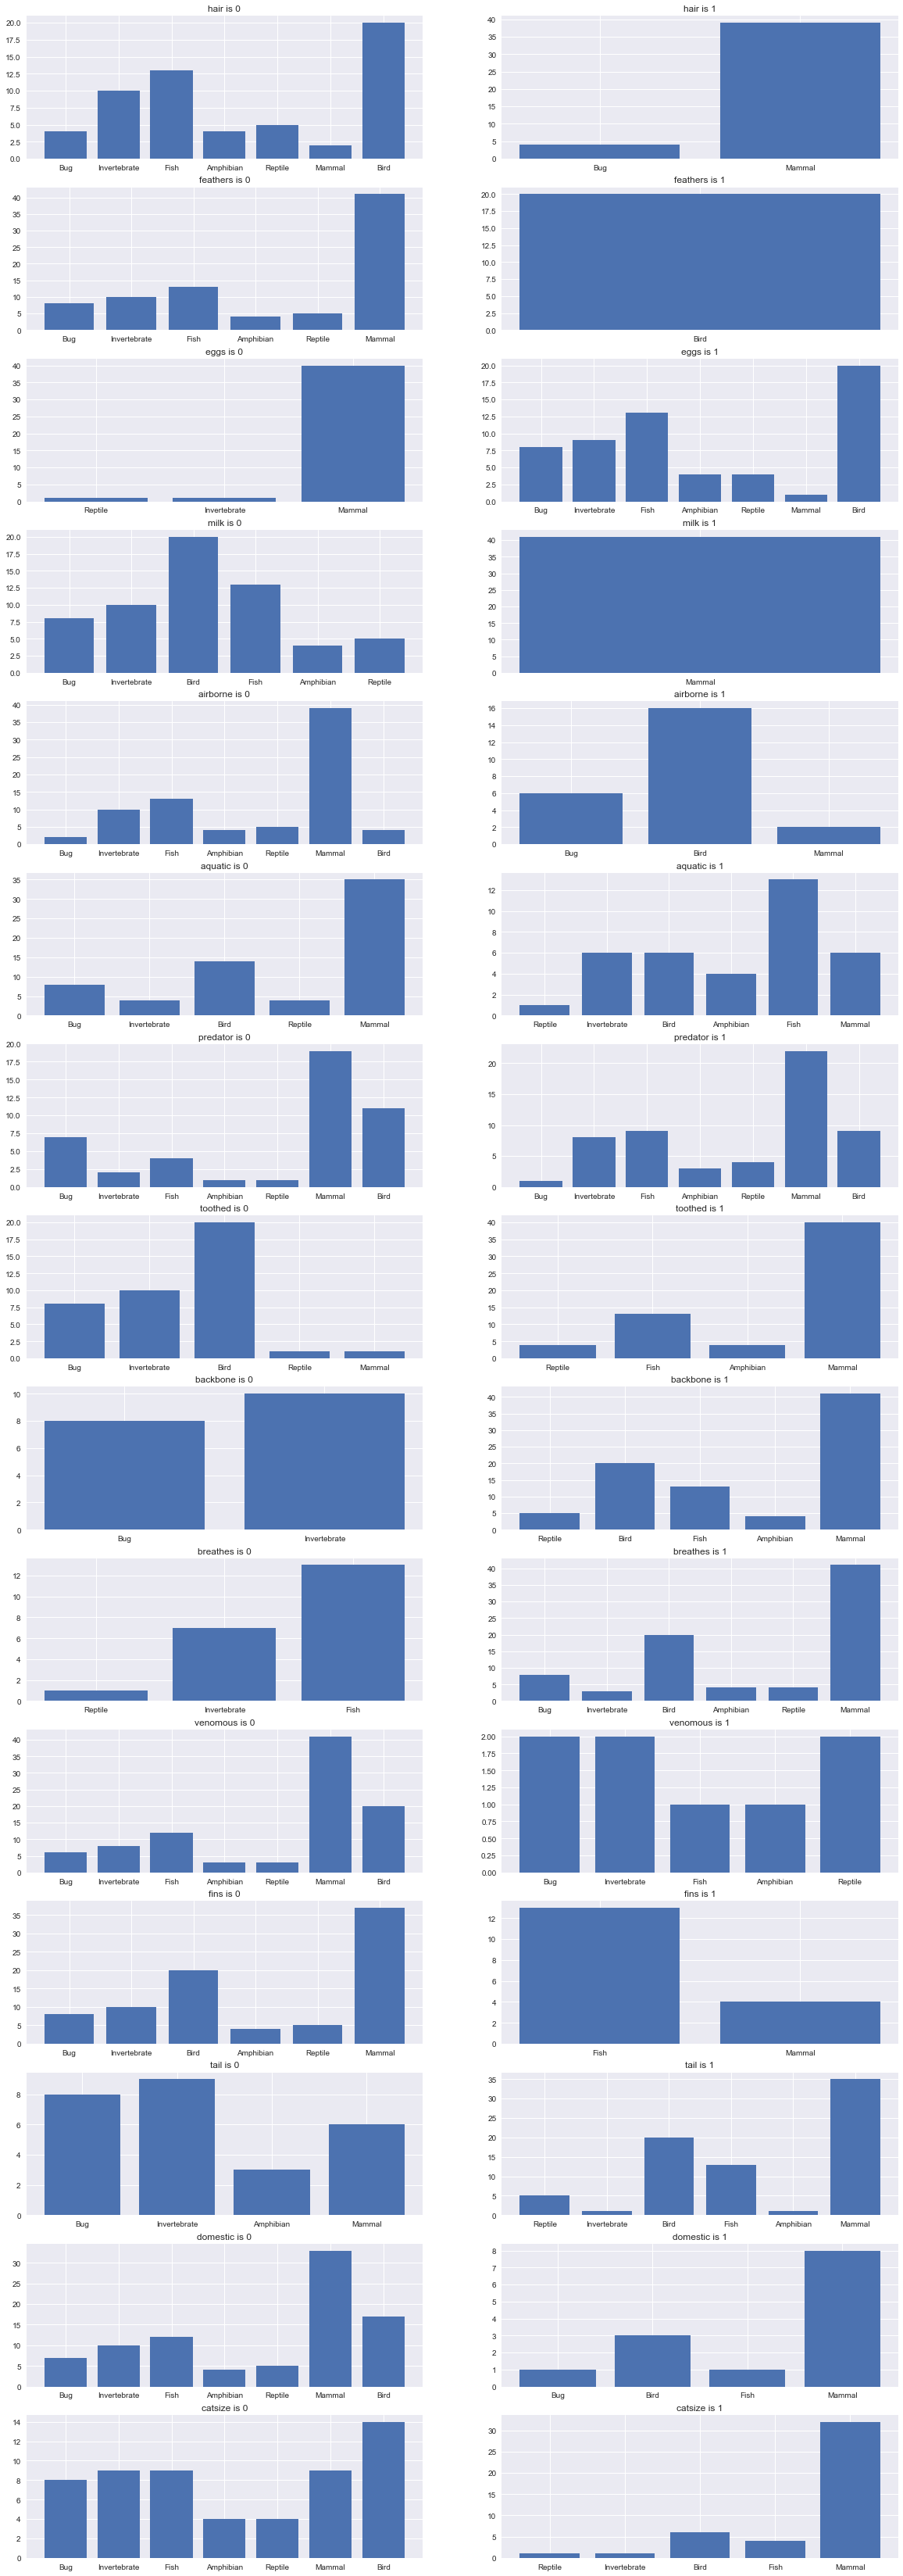

In [27]:
make_attribute_view(df_class, 'milk')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


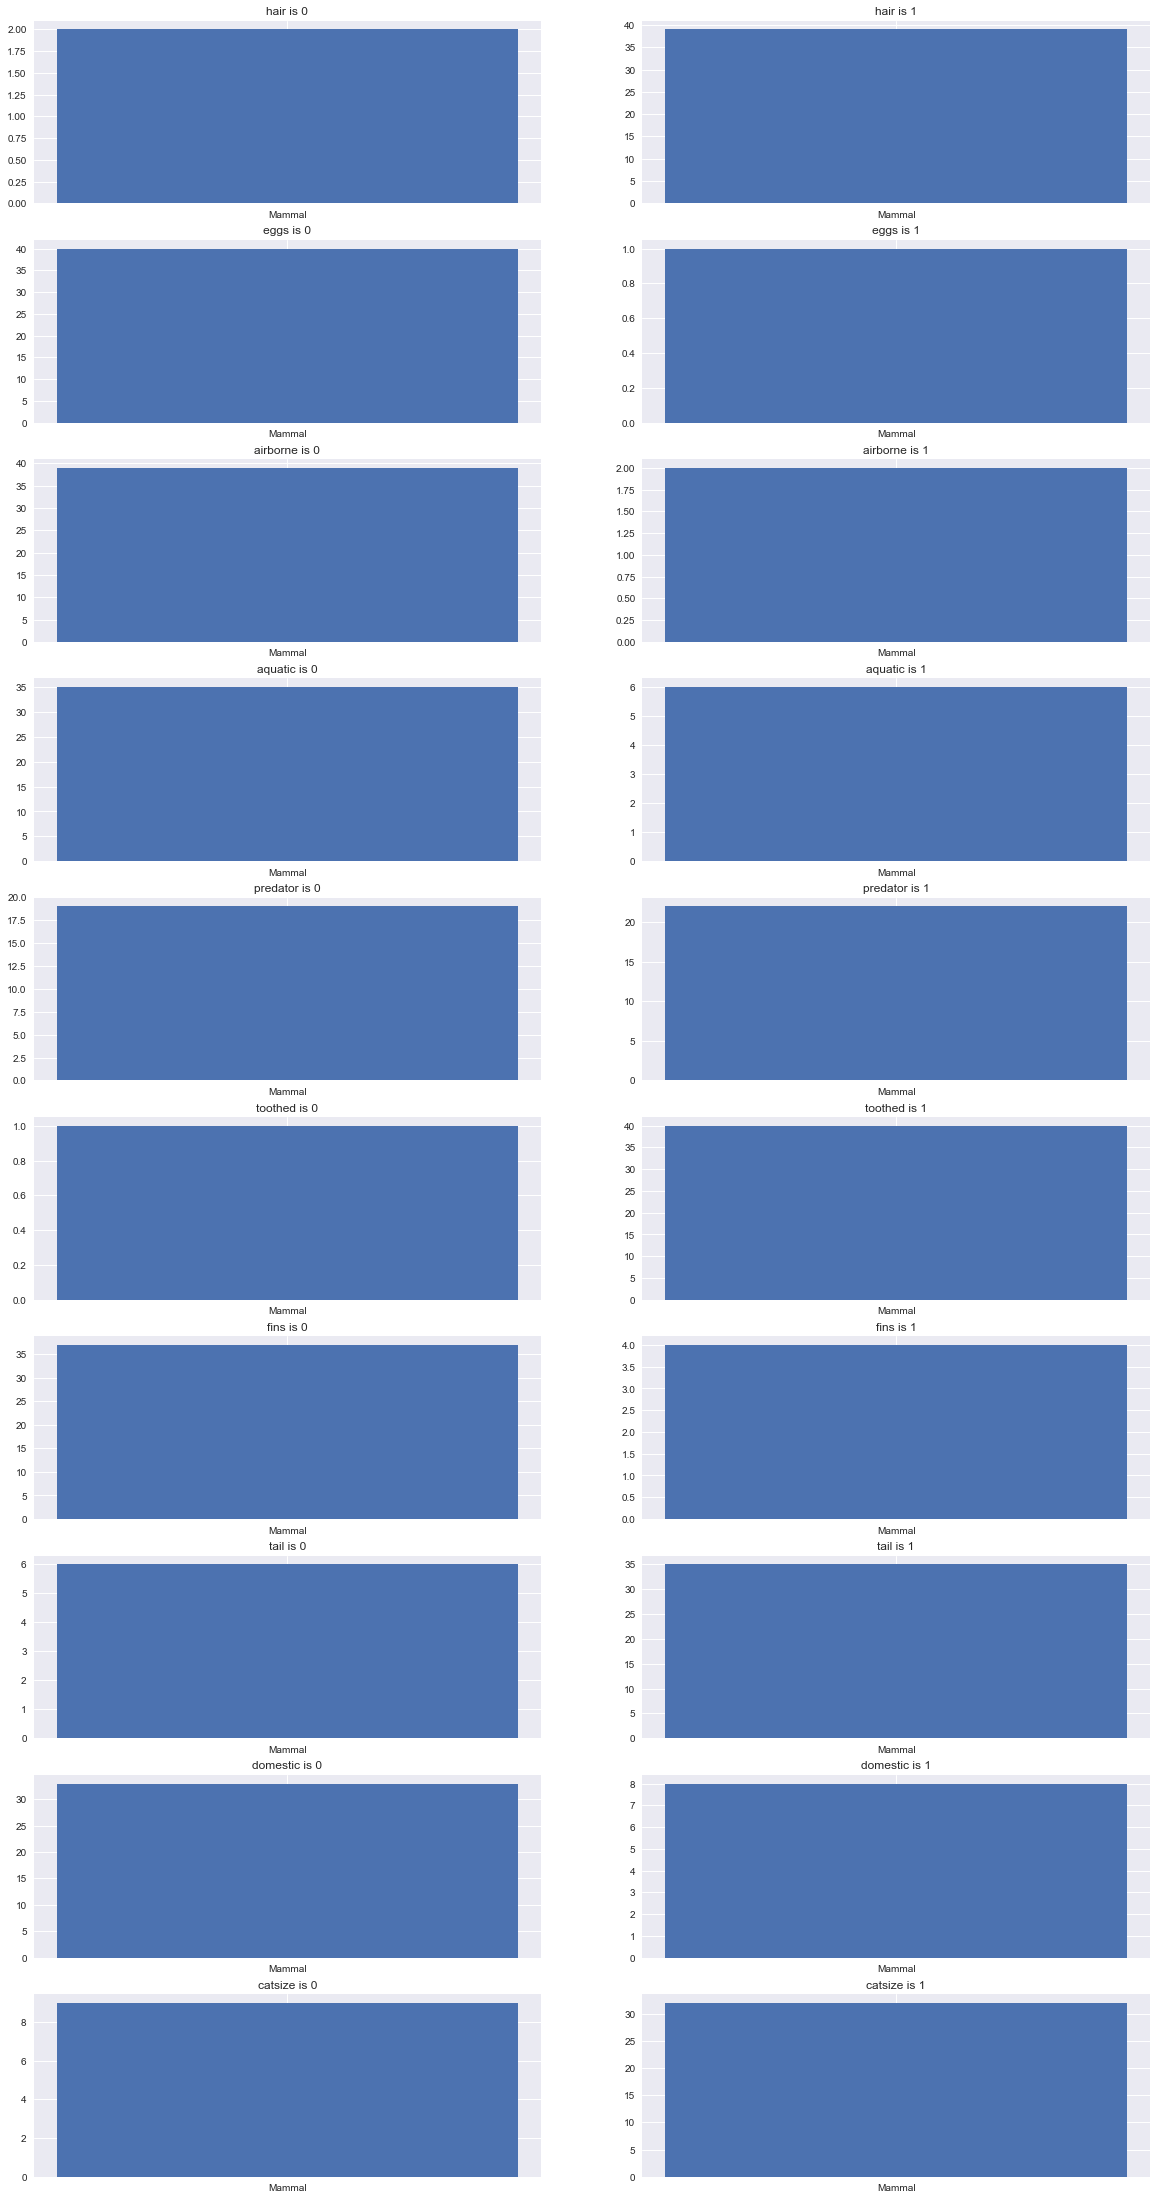

In [35]:
make_attribute_view(df_class[df_class['milk'] > 0.5], 'node18')

In [28]:
full_string = ""
for index, row in new_df.iterrows():
    node_name = row['current_node']
    attribute = row['attribute']
    plot_name = row['plot_name']
    samples = row['samples']
    class_name = row['class_name']
    value = row['value']
    gini = row['gini']
    if node_name=='0':
        result = 'node'+ str(node_name) + ' = {'\
        + 'text: { gini: "gini:' + gini \
        + '", samples: "samples: ' + samples \
        + '", attribute: "attribute: ' + str(attribute) \
        + '", class_name: "class_name: ' + class_name \
        + '", value: "value: ' + value \
        + '"},'\
        + 'connectors: {type: "curve", style: {"stroke-width": ' + str(int(samples)/5) + '}},' \
        + 'image:"' + plot_name + '"},'
    else:
        parent = row['parent_node']
        result = 'node'+ str(node_name) + ' = {' + "parent: node" + str(parent) \
        + ', text: {' \
        + 'gini: "gini: ' + gini \
        + '", samples: "samples: ' + samples \
        + '", attribute: "attribute: ' + str(attribute) \
        + '", class_name: "class_name: ' + class_name \
        + '", value: "value: ' + value \
        + '"},'\
        + 'connectors: {type: "curve", style: {"stroke-width": ' + str(int(samples)/5) + '}},' \
        + 'image:"' + plot_name + '"},' 
        
        
#     print(result)
    full_string+=result
    
    
#         + 'connectors: {type: "step", style: {"stroke-width": 2}},' \


In [29]:
first_part = 'var config = {container: "#basic-example", levelSeparation: 200, connectors: {type: "curve", style: { "stroke-width": 5}}, node: { HTMLclass: "nodeExample1"}}, '
last_part = "chart_config = [config," + ','.join(['node' + str(x) for x in list(new_df['current_node'].keys())])+'];'
whole_string = first_part + full_string + last_part
text_file = open("../treant-js/examples/decision-tree/basic-example.js", "w")
text_file.write(whole_string)
text_file.close()

In [30]:
whole_string

'var config = {container: "#basic-example", levelSeparation: 200, connectors: {type: "curve", style: { "stroke-width": 5}}, node: { HTMLclass: "nodeExample1"}}, node0 = {text: { gini: "gini:0.759", samples: "samples: 101", attribute: "attribute: milk <= 0.5", class_name: "class_name: Mammal", value: "value: [4, 20, 8, 13, 10, 41, 5]"},connectors: {type: "curve", style: {"stroke-width": 20.2}},image:"plots/gini0.png"},node1 = {parent: node0, text: {gini: "gini: 0.785", samples: "samples: 60", attribute: "attribute: feathers <= 0.5", class_name: "class_name: Bird", value: "value: [4, 20, 8, 13, 10, 0, 5]"},connectors: {type: "curve", style: {"stroke-width": 12.0}},image:"plots/gini1.png"},node2 = {parent: node1, text: {gini: "gini: 0.766", samples: "samples: 40", attribute: "attribute: fins <= 0.5", class_name: "class_name: Fish", value: "value: [4, 0, 8, 13, 10, 0, 5]"},connectors: {type: "curve", style: {"stroke-width": 8.0}},image:"plots/gini2.png"},node3 = {parent: node2, text: {gini